In [75]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
sns.set_theme(palette='rocket',
              font='Lucida Calligraphy',
              font_scale=1.5,
              rc=None)

import matplotlib
matplotlib.rcParams.update({'font.size': 10})
plt.style.use('bmh')

# Load dataset

In [77]:
df=pd.read_csv("predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


# About the dataset:



* **Product ID** - Product identification
* **Type** - L/M/H
* **Air temperature [K]** - Temperature in Kelvin
* **Process temperature [K]** - Temperature in Kelvin
* **Rotational speed [rpm]** - Rotation per minute
* **Torque [Nm]** - Torque in $N*m$
* **Tool wear [min]** - Time used
* **Target** - Failure/not
* **Failure Type** - Type of failure



# Exploratory Data Analysis

In [78]:
df = df.drop(["UDI","Product ID"],axis=1) #droping no use collums 

In [79]:
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [80]:
df['Failure Type'].replace('No Failure','No', inplace=True)
df['Failure Type'].replace('Power Failure','Power', inplace=True)
df['Failure Type'].replace('Tool Wear Failure','Wear', inplace=True)
df['Failure Type'].replace('Overstrain Failure','Strain', inplace=True)
df['Failure Type'].replace('Random Failures','Random', inplace=True)
df['Failure Type'].replace('Heat Dissipation Failure','Heat', inplace=True)

In [81]:
df['Failure Type'].unique()

array(['No', 'Power', 'Wear', 'Strain', 'Random', 'Heat'], dtype=object)

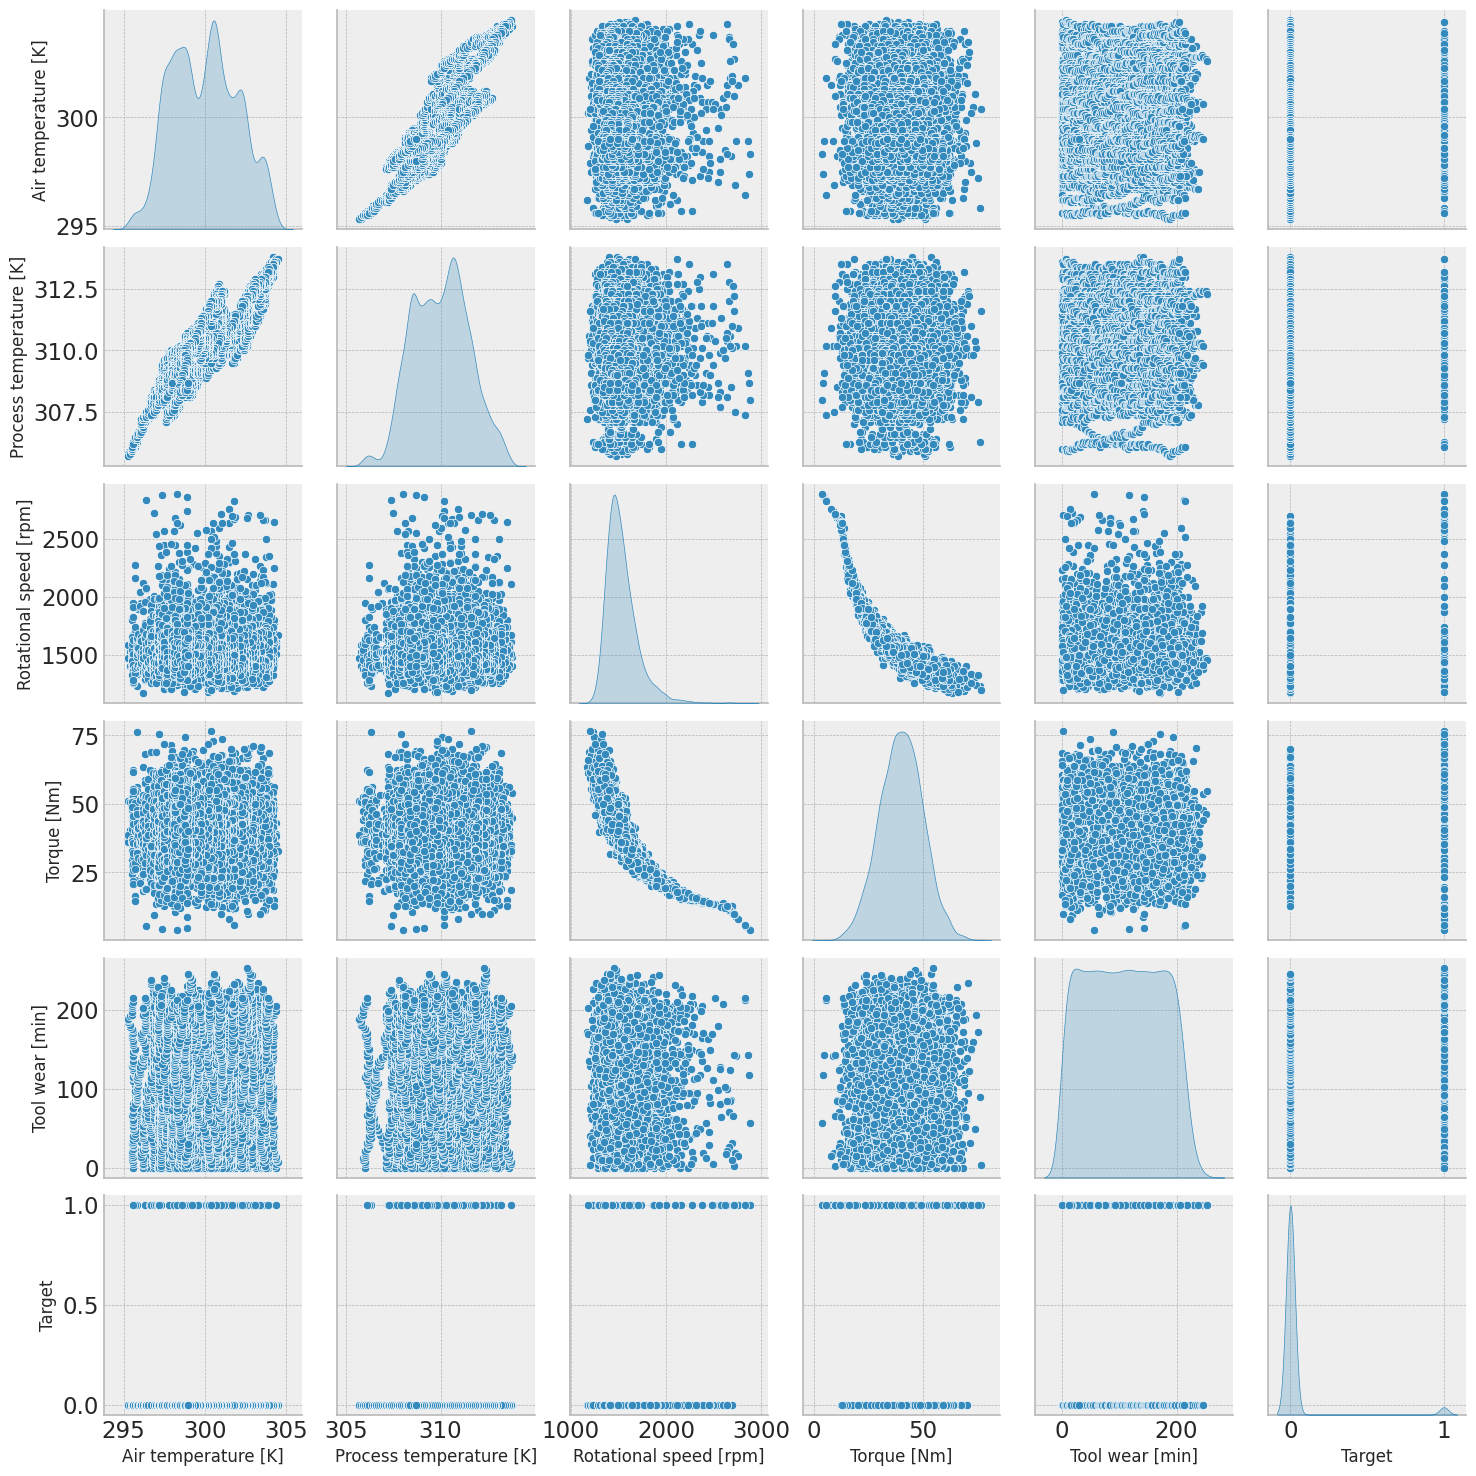

In [82]:
sns.pairplot(df,diag_kind="kde")

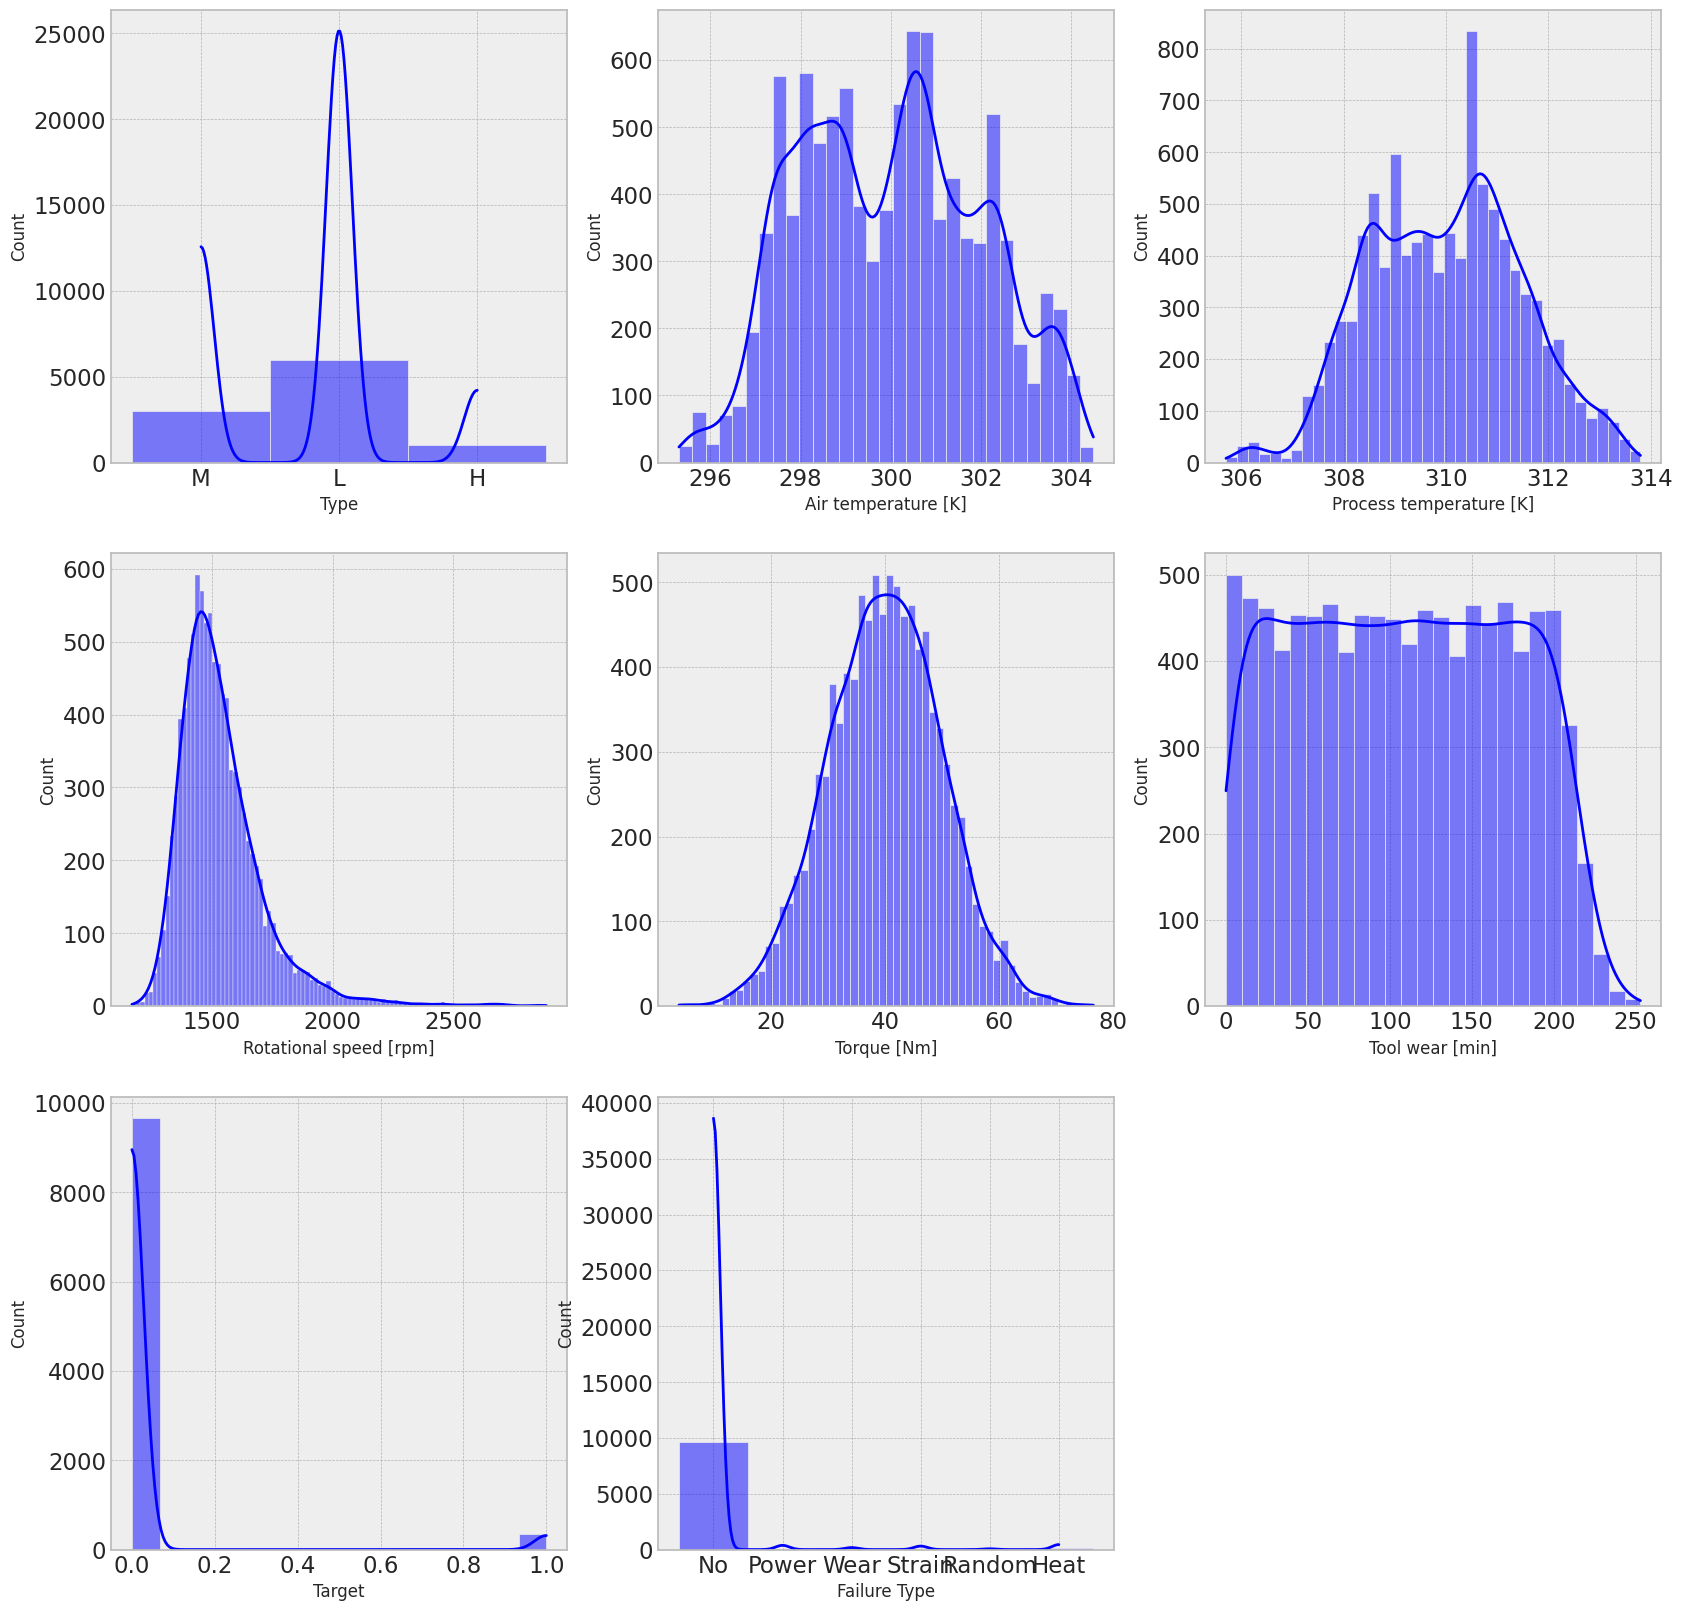

In [83]:
plt.figure(figsize=(20,20))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], kde = True, palette='rocket_r')

Rotational speed and Torque are highly correlated 

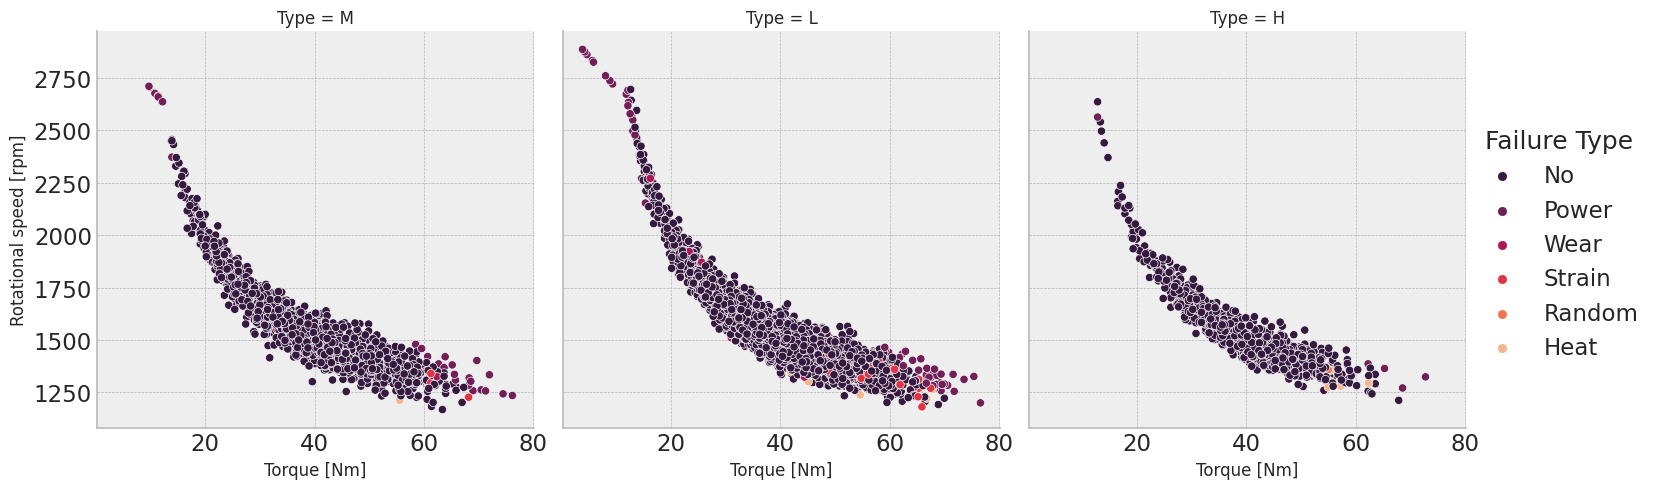

In [84]:
sns.relplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",col="Type",palette='rocket');

# Checking for outliers

<AxesSubplot:xlabel='Failure Type', ylabel='Torque [Nm]'>

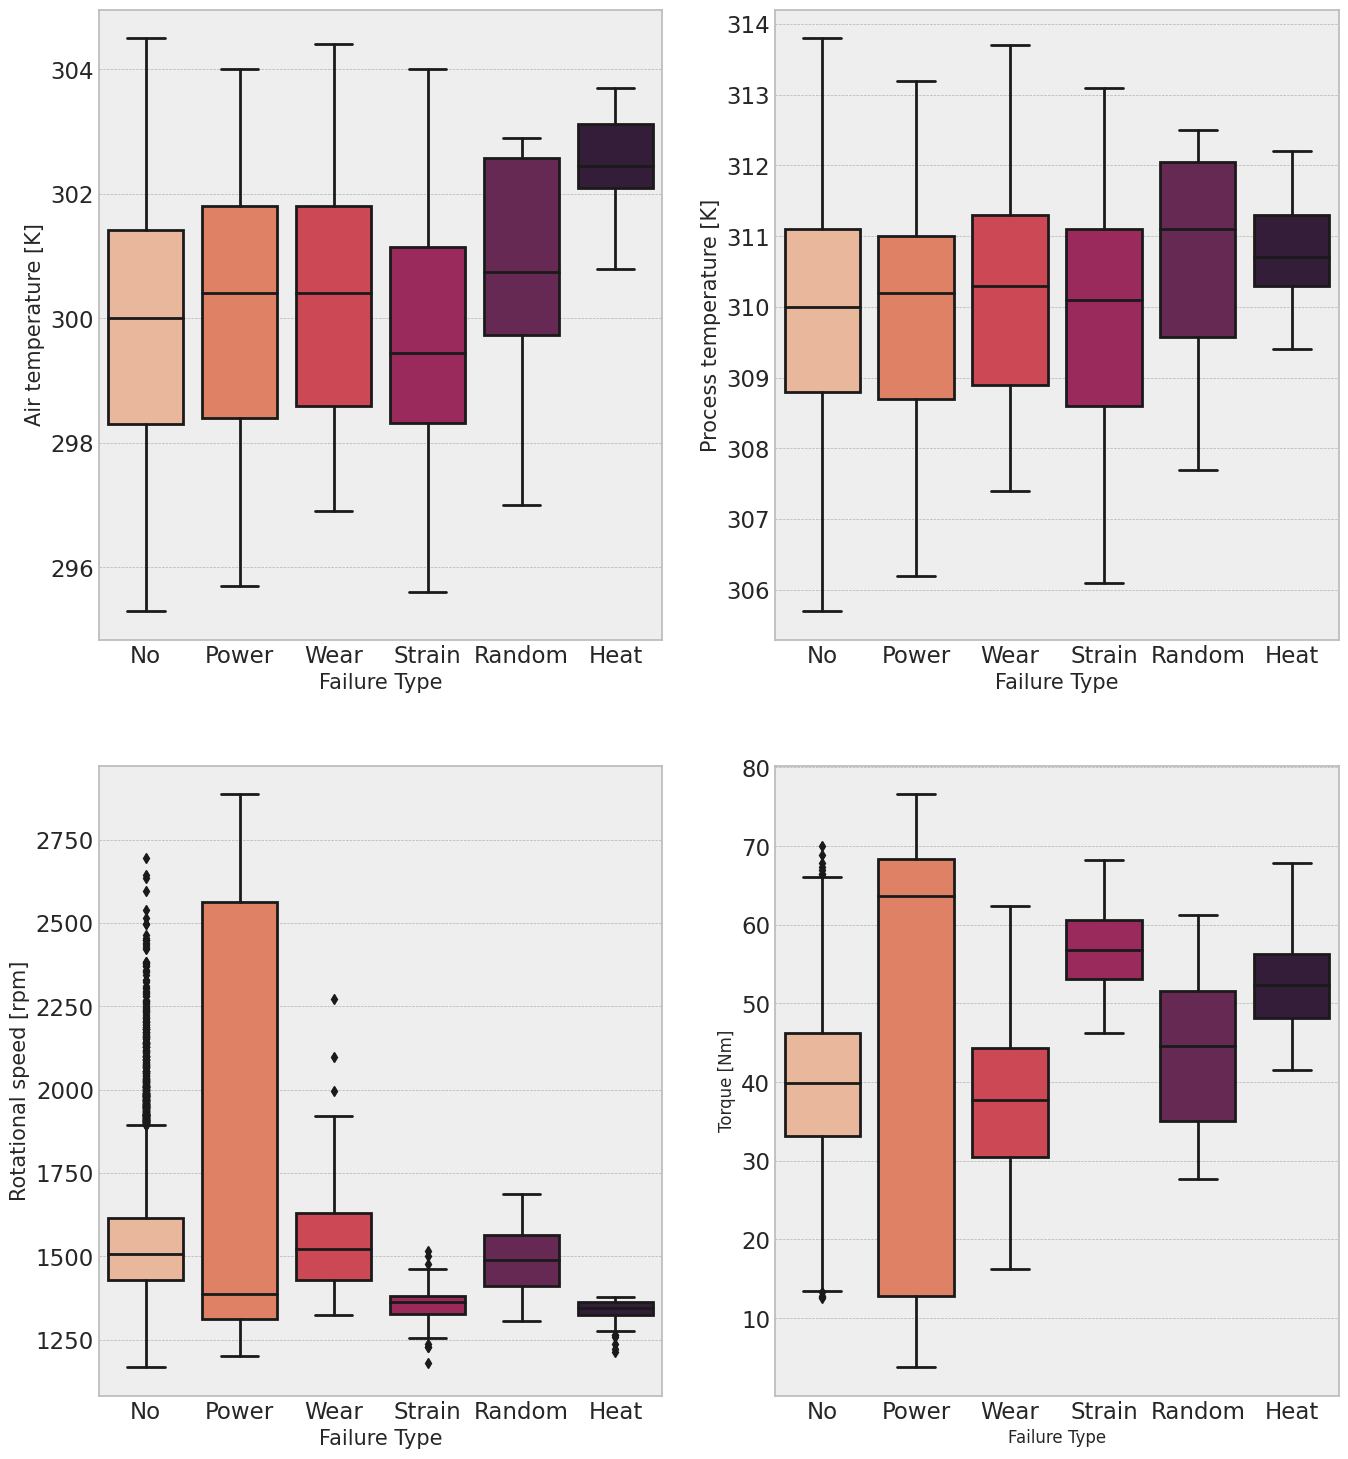

In [86]:
fig, ax = plt.subplots(2,2, figsize=(16,18))
sns.boxplot(y='Air temperature [K]', x="Failure Type", data=df, palette='rocket_r',ax=ax[0,0])
ax[0,0].set_xlabel("Failure Type",fontsize=15)
ax[0,0].set_ylabel("Air temperature [K]",fontsize=15)
sns.boxplot(y='Process temperature [K]', x="Failure Type", data=df, palette='rocket_r',ax=ax[0,1])
ax[0,1].set_xlabel("Failure Type",fontsize=15)
ax[0,1].set_ylabel("Process temperature [K]",fontsize=15)
sns.boxplot(y='Rotational speed [rpm]', x="Failure Type", data=df, palette='rocket_r', ax=ax[1,0])
ax[1,0].set_xlabel("Failure Type",fontsize=15)
ax[1,0].set_ylabel("Rotational speed [rpm]",fontsize=15)
sns.boxplot(y='Torque [Nm]', x="Failure Type", data=df, palette='rocket_r', ax=ax[1,1])